In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 999

In [3]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.loc[1:2]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [6]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [8]:
# All null values are changed:

mean_age = round(df['Age'].mean())
random_cabin = 'emre'
top_embarked = df['Embarked'].describe().loc['top']

df['Age'].fillna(mean_age, inplace=True)
df['Cabin'].fillna(random_cabin, inplace=True)
df['Embarked'].fillna(top_embarked, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [9]:
# If we have outliers value, we will change them after inspect histograms. 

# df.loc[7, 'Duration'] = 45

# for x in df.index:
#   if df.loc[x, "Duration"] > 120:
#     df.loc[x, "Duration"] = 120
    
# for x in df.index:
#   if df.loc[x, "Duration"] > 120:
#     df.drop(x, inplace = True) 

In [10]:
count = 0
for i in df.index:
    if df.duplicated()[i] == True:
        count += 1 
if count == 0:
    print('No duplicates rows.')

No duplicates rows.


In [15]:
x = df.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
x

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.00,1,0,7.2500
2,1,1,38.00,1,0,71.2833
3,1,3,26.00,0,0,7.9250
4,1,1,35.00,1,0,53.1000
5,0,3,35.00,0,0,8.0500
6,0,3,30.00,0,0,8.4583
7,0,1,54.00,0,0,51.8625
8,0,3,2.00,3,1,21.0750
9,1,3,27.00,0,2,11.1333


In [ ]:
x1 = df.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Fare', ])

In [16]:
x.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500
Age,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000


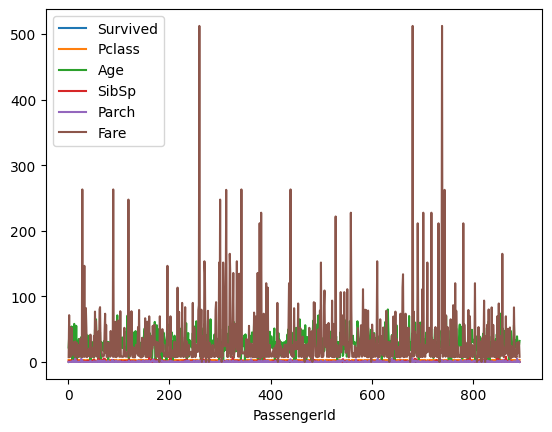

In [17]:
df.plot()
plt.show()

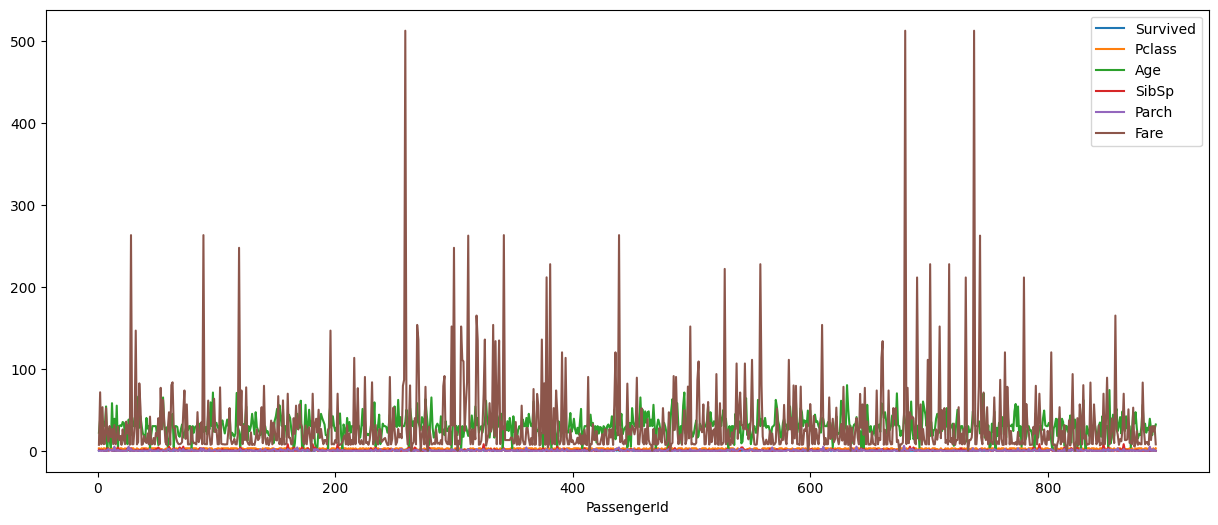

In [25]:
df.plot()
plt.gcf().set_size_inches(15, 6)
plt.show()

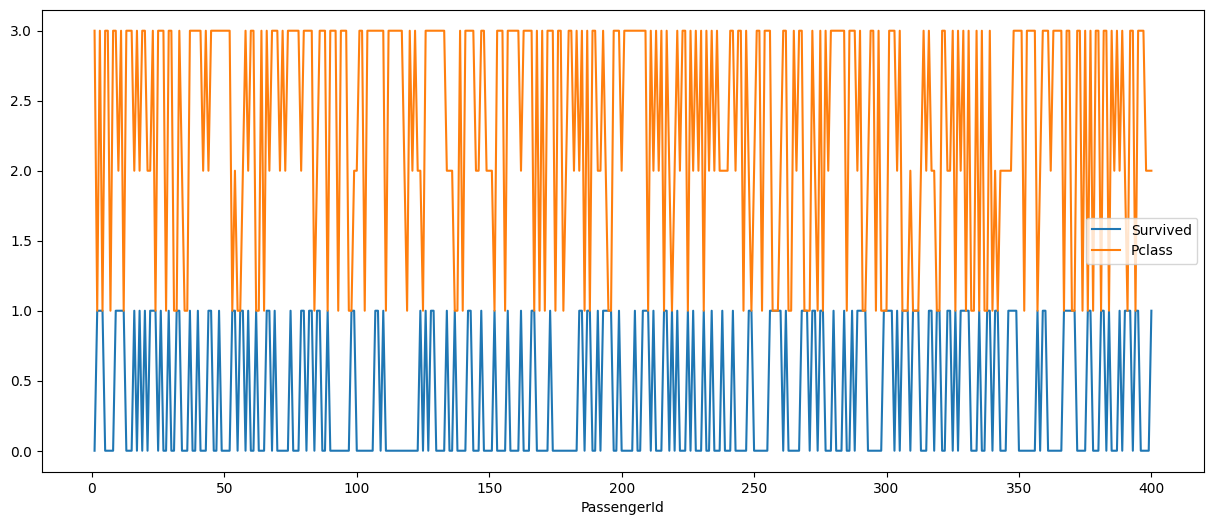

In [24]:
df.loc[0:400, ['Survived', 'Pclass']].plot()
plt.gcf().set_size_inches(15, 6)
plt.show()

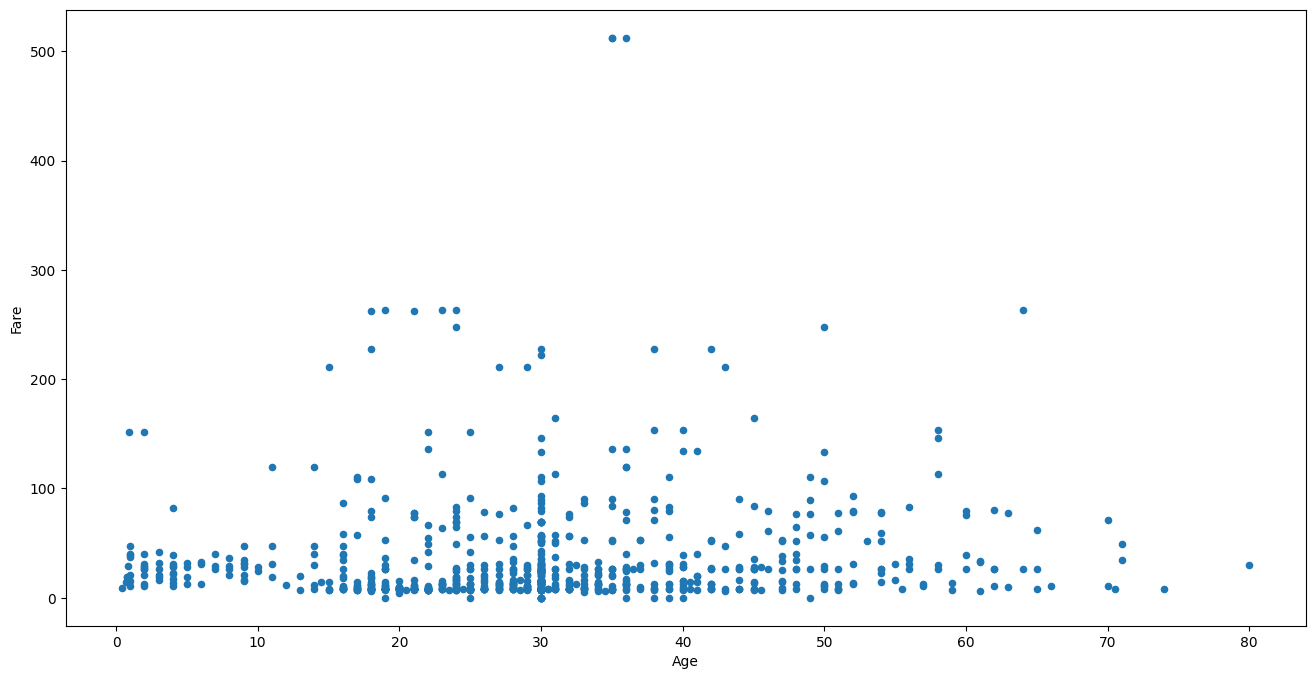

In [36]:
df.plot(kind='scatter', x = 'Age', y = 'Fare')
plt.gcf().set_size_inches(16, 8)
plt.show()

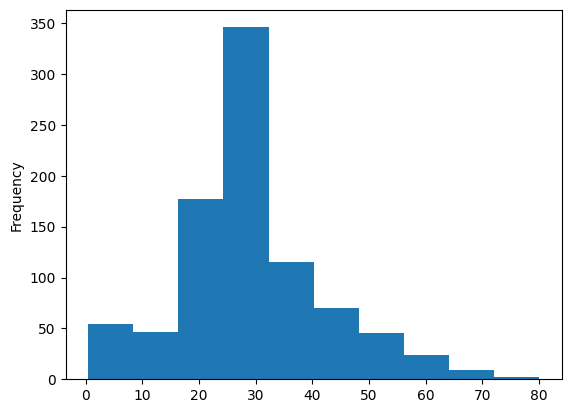

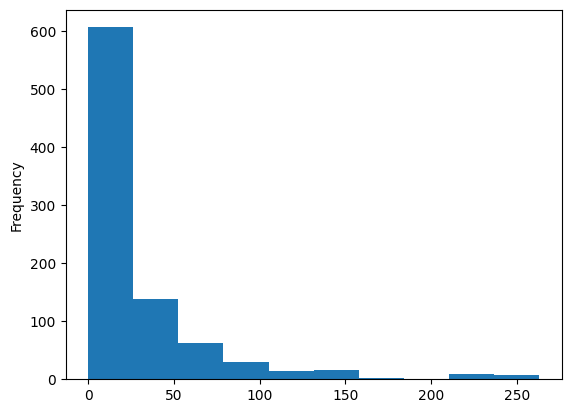

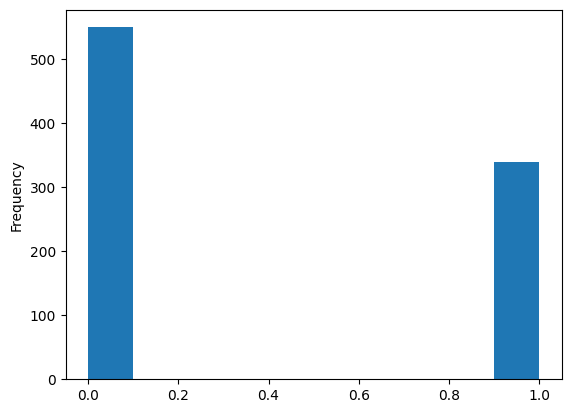

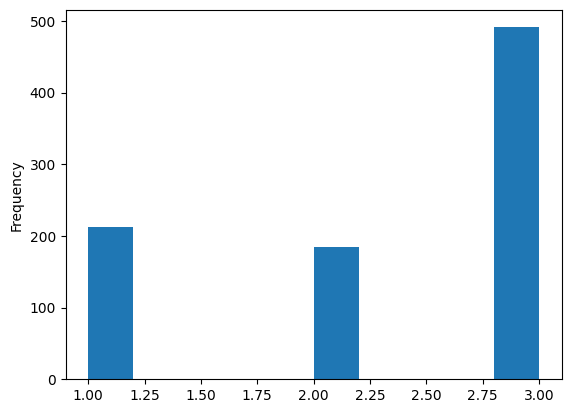

In [62]:
df['Age'].plot(kind='hist')
plt.show()

df['Fare'].plot(kind='hist')
plt.show()

df['Survived'].plot(kind='hist')
plt.show()

df['Pclass'].plot(kind='hist')
plt.show()

<Axes: ylabel='Frequency'>

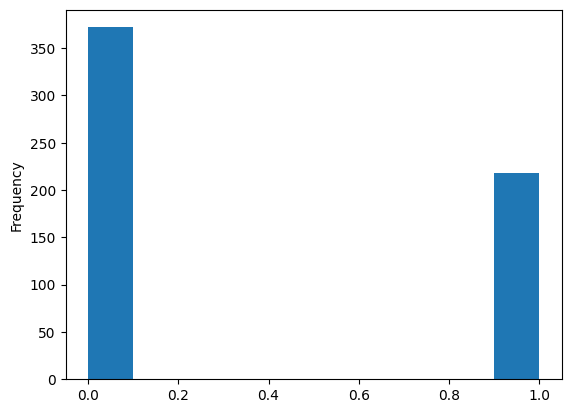

In [60]:
a = df[df['Age'] > 25]

a['Survived'].plot(kind='hist')

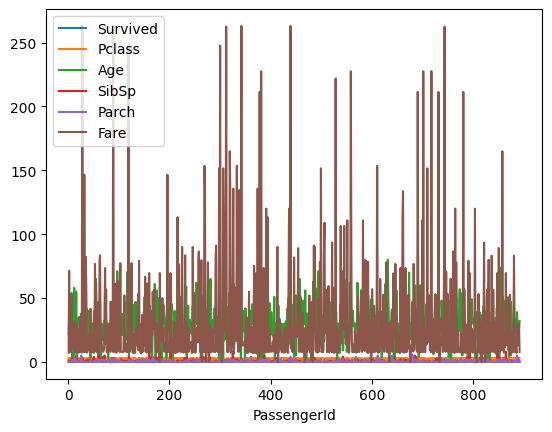

In [61]:
for x in df.index:
  if df.loc[x, "Fare"] > 300:
    df.drop(x, inplace = True) 

df.plot()
plt.show()

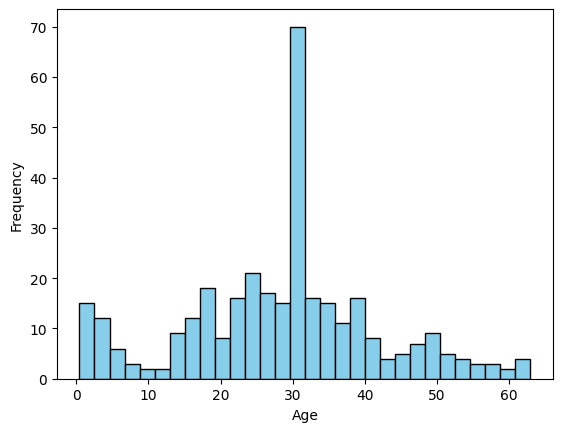

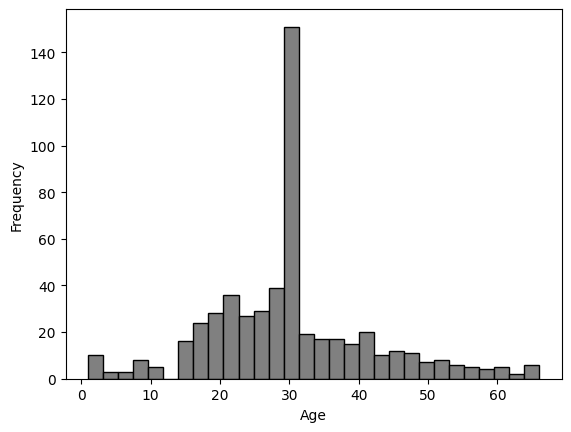

In [76]:
df_l = df[df['Survived'] == 1]
df_d = df[df['Survived'] == 0]

df_l[df_l['Age'] < 70]['Age'].plot(kind='hist', bins=30, color='skyblue', edgecolor = 'black')
plt.xlabel('Age')
plt.show()

df_d[df_d['Age'] < 70]['Age'].plot(kind='hist', bins=30, color='gray', edgecolor = 'black')
plt.xlabel('Age')
plt.show()